In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
raw_data = pd.read_csv('project.csv', encoding= 'unicode_escape')

In [4]:
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [5]:
raw_data.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,1430,1464,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,130,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [6]:
raw_data.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
cleaned_data = raw_data.dropna(axis=1)
cleaned_data[50:100]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
50,44501,UP-2011-3090,1/3/2011,1/3/2011,Same Day,BS-1800,Bryan Spruell,Home Office,Kherson,Kherson,...,OFF-STA-10000298,Office Supplies,Art,"Stanley Canvas, Blue",98.940,2,0.00,15.7800,8.42,Medium
51,15220,ES-2011-3893444,1/3/2011,5/3/2011,Standard Class,TB-21400,Tom Boeckenhauer,Consumer,Berlin,Berlin,...,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",63.360,3,0.20,23.7600,8.22,High
52,39247,CA-2011-131009,1/3/2011,5/3/2011,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,...,OFF-ST-10001469,Office Supplies,Storage,Fellowes Bankers Box Recycled Super Stor/Drawer,129.552,3,0.20,-22.6716,8.00,Medium
53,39246,CA-2011-131009,1/3/2011,5/3/2011,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,...,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,6,0.60,-34.9536,7.38,Medium
54,48594,UP-2011-3730,1/3/2011,5/3/2011,Standard Class,RD-9900,Ruben Dartt,Consumer,Vinnytsya,Vinnytsya,...,TEC-STA-10004927,Technology,Machines,"StarTech Receipt Printer, Wireless",221.160,2,0.00,15.4800,6.87,Medium
55,44227,CA-2011-1800,1/3/2011,4/3/2011,First Class,TP-11415,Tom Prescott,Consumer,Toronto,Ontario,...,OFF-ACC-10004692,Office Supplies,Binders,"Acco 3-Hole Punch, Recycled",30.480,1,0.00,2.7300,6.70,High
56,12530,ES-2011-1416586,1/3/2011,4/3/2011,Second Class,EL-13735,Ed Ludwig,Home Office,Bochum,North Rhine-Westphalia,...,TEC-MA-10001825,Technology,Machines,"Epson Calculator, Durable",46.530,1,0.00,12.5400,6.09,Medium
57,21919,IN-2011-59986,1/3/2011,3/3/2011,First Class,KH-16360,Katherine Hughes,Consumer,Adelaide,South Australia,...,OFF-SU-10001770,Office Supplies,Supplies,"Acme Scissors, Easy Grip",24.354,1,0.10,8.9040,5.44,High
58,30177,ID-2011-50144,1/3/2011,5/3/2011,Standard Class,LH-17155,Logan Haushalter,Consumer,Hobart,Tasmania,...,OFF-PA-10000116,Office Supplies,Paper,"Xerox Parchment Paper, Premium",23.868,3,0.40,-7.6320,3.90,High
59,48598,UP-2011-3730,1/3/2011,5/3/2011,Standard Class,RD-9900,Ruben Dartt,Consumer,Vinnytsya,Vinnytsya,...,OFF-ELD-10002578,Office Supplies,Storage,"Eldon Box, Single Width",61.740,6,0.00,17.8200,3.73,Medium


In [9]:
data_1 = cleaned_data[['Ship Mode','Segment','City','State','Country','Market','Region','Category','Sub-Category','Product Name','Sales','Quantity','Discount','Profit','Shipping Cost','Order Priority']]
data_1

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,Fairfield,California,United States,US,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,Standard Class,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,Second Class,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,Standard Class,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [10]:
data_1.describe(include='all')

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,4,3,3636,1094,147,7,13,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,Standard Class,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,30775,26518,915,2001,9994,11002,11117,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


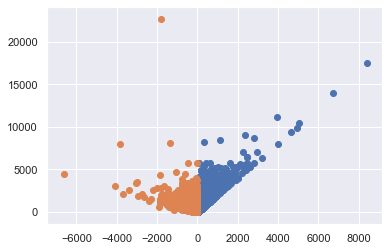

In [11]:
reg_all = cleaned_data[['Ship Mode','Sales','Shipping Cost','Profit']]
reg_allprofit = reg_all[reg_all['Profit']>=0]
reg_allloss = reg_all[reg_all['Profit']<0]
plt.scatter(reg_allprofit['Profit'],reg_allprofit['Sales'])
plt.scatter(reg_allloss['Profit'],reg_allloss['Sales'])

In [78]:

reg_allloss.head()

,Ship Mode,Sales,Shipping Cost,Profit
3,Second Class,44.865,4.82,-26.0550
15,Standard Class,81.984,6.21,-19.1360
22,Standard Class,9.576,0.81,-0.9840
27,Standard Class,634.116,70.05,-172.1172
34,Standard Class,376.509,32.70,-43.0296


In [79]:
reg_allprofit.head()

,Ship Mode,Sales,Shipping Cost,Profit
0,Standard Class,408.300,35.46,106.140
1,Standard Class,120.366,9.72,36.036
2,Second Class,66.120,8.17,29.640
4,Standard Class,113.670,4.70,37.770
5,Standard Class,55.242,1.80,15.342


In [14]:
# # Regression data for Profit

standard_profit = reg_allprofit[reg_allprofit['Ship Mode']=='Standard Class']
second_profit = reg_allprofit[reg_allprofit['Ship Mode']=='Second Class']
first_profit = reg_allprofit[reg_allprofit['Ship Mode']=='First Class']
same_profit = reg_allprofit[reg_allprofit['Ship Mode']=='Same Day']

# Regression data for Loss

standard_loss = reg_allloss[reg_allloss['Ship Mode']=='Standard Class']
second_loss = reg_allloss[reg_allloss['Ship Mode']=='Second Class']
first_loss = reg_allloss[reg_allloss['Ship Mode']=='First Class']
same_loss = reg_allloss[reg_allloss['Ship Mode']=='Same Day']

standard_profit.head()




,Ship Mode,Sales,Shipping Cost,Profit
0,Standard Class,408.300,35.46,106.140
1,Standard Class,120.366,9.72,36.036
4,Standard Class,113.670,4.70,37.770
5,Standard Class,55.242,1.80,15.342
11,Standard Class,400.704,21.38,20.024


In [19]:
# Converting the data into standard form 
std_scaler = StandardScaler()

## Standardization for standard shipping mode

standard_profit = standard_profit[['Sales','Shipping Cost','Profit']]
standard_profit = pd.DataFrame(std_scaler.fit_transform(standard_profit), columns = standard_profit.columns)


standard_loss = standard_loss[['Sales','Shipping Cost','Profit']]
standard_loss = pd.DataFrame(std_scaler.fit_transform(standard_loss), columns = standard_loss.columns)

## Standardization for second shipping mode

second_profit = second_profit[['Sales','Shipping Cost','Profit']]
second_profit = pd.DataFrame(std_scaler.fit_transform(second_profit), columns = second_profit.columns)

second_loss = second_loss[['Sales','Shipping Cost','Profit']]
second_loss = pd.DataFrame(std_scaler.fit_transform(second_loss), columns = second_loss.columns)

## Standardization for First shipping mode

first_profit = first_profit[['Sales','Shipping Cost','Profit']]
first_profit = pd.DataFrame(std_scaler.fit_transform(first_profit), columns = first_profit.columns)


first_loss = first_loss[['Sales','Shipping Cost','Profit']]
first_loss = pd.DataFrame(std_scaler.fit_transform(first_loss), columns = first_loss.columns)

## Standardization for same shipping mode

same_profit = same_profit[['Sales','Shipping Cost','Profit']]
same_profit = pd.DataFrame(std_scaler.fit_transform(same_profit), columns = same_profit.columns)

same_loss = same_loss[['Sales','Shipping Cost','Profit']]
same_loss = pd.DataFrame(std_scaler.fit_transform(same_loss), columns = same_loss.columns)
same_loss.head()



,Sales,Shipping Cost,Profit
0,-0.195805,-0.207568,-0.074431
1,-0.394958,-0.394735,0.222292
2,-0.400338,-0.397279,0.248733
3,-0.378444,-0.401430,0.244401
4,1.759593,-0.084530,0.169643


In [29]:
# For the Standard mode of delivery (Profit)
# Regression model 

x1 = standard_profit[['Sales','Shipping Cost']]
y1 = standard_profit[['Profit']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2)
x1_train, y1_train = np.array(x1_train), np.array(y1_train)

model = LinearRegression().fit(x1_train, y1_train)
model.predict(x1_test)
model.score(x1_test,y1_test)


0.6436393006309071

In [31]:
# For the Standard mode of delivery (Profit) Regression result
x1 = sm.add_constant(x1)
model = sm.OLS(y1, x1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 2.872e+04
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:53:15   Log-Likelihood:                -18515.
No. Observations:               23241   AIC:                         3.704e+04
Df Residuals:                   23238   BIC:                         3.706e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.373e-18      0.004   2.09e-15      1.000      -0.007       0.007
Sales             1.0206      0.007    137.634      0.000       1.006       1.035
Shipping Cost    -0.2074      0.007    -27.974      0.000      -0.222      -0.193
==============================================================================
Omnibus:                    23545.767   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28588651.574
Skew:                           3.982   Prob(JB):                         0.00
Kurtosis:                     174.636   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# For the Standard mode of delivery (Loss)
# Regression model 

x1_L = standard_loss[['Sales','Shipping Cost']]
y1_L = standard_loss[['Profit']]
x1_L_train, x1_L_test, y1_L_train, y1_L_test = train_test_split(x1_L,y1_L,test_size=0.2)
x1_L_train, y1_L_train = np.array(x1_L_train), np.array(y1_L_train)

model = LinearRegression().fit(x1_L_train, y1_L_train)
model.predict(x1_L_test)
model.score(x1_L_test,y1_L_test)

0.2189308640269728

In [33]:
# For the Standard mode of delivery (Profit) Regression result
x1_L = sm.add_constant(x1_L)
model = sm.OLS(y1_L, x1_L)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1551.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:56:56   Log-Likelihood:                -9390.8
No. Observations:                7534   AIC:                         1.879e+04
Df Residuals:                    7531   BIC:                         1.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.908e-17      0.010  -1.97e-15      1.000      -0.019       0.019
Sales            -0.3038      0.014    -21.960      0.000      -0.331      -0.277
Shipping Cost    -0.2798      0.014    -20.224      0.000      -0.307      -0.253
==============================================================================
Omnibus:                    12263.377   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21890258.782
Skew:                         -10.324   Prob(JB):                         0.00
Kurtosis:                     266.261   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# For the Second mode of delivery (Profit)
# Regression model 

x2 = second_profit[['Sales','Shipping Cost']]
y2 = second_profit[['Profit']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2)
x2_train, y2_train = np.array(x2_train), np.array(y2_train)

model = LinearRegression().fit(x2_train, y2_train)
model.predict(x2_test)
model.score(x2_test,y2_test)

0.6719113392863514

In [37]:
# For the Standard mode of delivery (Profit) Regression result
x2 = sm.add_constant(x2)
model = sm.OLS(y2, x2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     8203.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:01:16   Log-Likelihood:                -6682.2
No. Observations:                7827   AIC:                         1.337e+04
Df Residuals:                    7824   BIC:                         1.339e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.674e-18      0.006  -1.35e-15      1.000      -0.013       0.013
Sales             0.7925      0.011     70.941      0.000       0.771       0.814
Shipping Cost     0.0368      0.011      3.290      0.001       0.015       0.059
==============================================================================
Omnibus:                     2812.449   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1329013.569
Skew:                           0.156   Prob(JB):                         0.00
Kurtosis:                      66.836   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# For the second mode of delivery (loss)
# Regression model 

x2_L = second_loss[['Sales','Shipping Cost']]
y2_L = second_loss[['Profit']]
x2_L_train, x2_L_test, y2_L_train, y2_L_test = train_test_split(x2_L,y2_L,test_size=0.2)
x2_L_train, y2_L_train = np.array(x2_L_train), np.array(y2_L_train)

model = LinearRegression().fit(x2_L_train, y2_L_train)
model.predict(x2_L_test)
model.score(x2_L_test,y2_L_test)

0.24283415821135668

In [35]:
# For the second mode of delivery (Profit) Regression result
x2_L = sm.add_constant(x2_L)
model = sm.OLS(y2_L, x2_L)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     573.1
Date:                Tue, 03 Nov 2020   Prob (F-statistic):          2.67e-205
Time:                        20:59:16   Log-Likelihood:                -3050.2
No. Observations:                2482   AIC:                             6106.
Df Residuals:                    2479   BIC:                             6124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.862e-17      0.017  -1.72e-15      1.000      -0.033       0.033
Sales            -0.5925      0.029    -20.286      0.000      -0.650      -0.535
Shipping Cost     0.0372      0.029      1.275      0.203      -0.020       0.095
==============================================================================
Omnibus:                     2869.331   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           495829.078
Skew:                          -5.729   Prob(JB):                         0.00
Kurtosis:                      71.288   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# For the first mode of delivery (loss)
# Regression model 

x3_L = first_loss[['Sales','Shipping Cost']]
y3_L = first_loss[['Profit']]
x3_L_train, x3_L_test, y3_L_train, y3_L_test = train_test_split(x3_L,y3_L,test_size=0.2)
x3_L_train, y3_L_train = np.array(x3_L_train), np.array(y3_L_train)

model = LinearRegression().fit(x3_L_train, y3_L_train)
model.predict(x3_L_test)
model.score(x3_L_test,y3_L_test)

0.3287351854398898

In [39]:
# For the first mode of delivery (Profit) Regression result
x3_L = sm.add_constant(x3_L)
model = sm.OLS(y3_L, x3_L)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     480.1
Date:                Tue, 03 Nov 2020   Prob (F-statistic):          3.67e-169
Time:                        21:04:25   Log-Likelihood:                -2282.0
No. Observations:                1882   AIC:                             4570.
Df Residuals:                    1879   BIC:                             4587.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.255e-17      0.019   -1.2e-15      1.000      -0.037       0.037
Sales            -0.6199      0.036    -17.250      0.000      -0.690      -0.549
Shipping Cost     0.0455      0.036      1.266      0.206      -0.025       0.116
==============================================================================
Omnibus:                     1866.459   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213718.244
Skew:                          -4.427   Prob(JB):                         0.00
Kurtosis:                      54.449   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# For the first mode of delivery (Profit)
# Regression model 

x3 = first_profit[['Sales','Shipping Cost']]
y3 = first_profit[['Profit']]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.2)
x3_train, y3_train = np.array(x3_train), np.array(y3_train)

model = LinearRegression().fit(x3_train, y3_train)
model.predict(x3_test)
model.score(x3_test,y3_test)

0.6718042872396267

In [41]:
# For the first mode of delivery (Profit) Regression result
x3 = sm.add_constant(x3)
model = sm.OLS(y3, x3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     8457.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:07:05   Log-Likelihood:                -4074.4
No. Observations:                5623   AIC:                             8155.
Df Residuals:                    5620   BIC:                             8175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.017e-17      0.007  -3.03e-15      1.000      -0.013       0.013
Sales             0.9958      0.010    102.078      0.000       0.977       1.015
Shipping Cost    -0.1906      0.010    -19.540      0.000      -0.210      -0.171
==============================================================================
Omnibus:                     3627.089   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3459999.564
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                     124.479   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Doing a regression analysis for the loss making shipping mode

standardl = reg_allloss[reg_allloss['Ship Mode']=='Standard Class']
secondl = reg_allloss[reg_allloss['Ship Mode']=='Second Class']
firstl = reg_allloss[reg_allloss['Ship Mode']=='First Class']
samel = reg_allloss[reg_allloss['Ship Mode']=='Same Day']
standardl1 = standardl[['Sales','Shipping Cost','Profit']]
std_scaler = StandardScaler()
standardl1 = pd.DataFrame(std_scaler.fit_transform(standardl1), columns = standardl1.columns)
standardl1.head()


x1 = standardl1[['Sales','Shipping Cost']]
y1 = standardl1[['Profit']]
x1, y1 = np.array(x1), np.array(y1)
model = LinearRegression().fit(x1, y1)

r_sq = model.score(x1, y1)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
x1 = sm.add_constant(x1)
model = sm.OLS(y1, x1)
results = model.fit()
results.summary()
model = LinearRegression().fit(x1, y1)

coefficient of determination: 0.2917627958207978
intercept: [7.04011242e-18]
slope: [[-0.30377743 -0.27976589]]


In [52]:
## Polynomial regression with train and test data
from sklearn.model_selection import train_test_split
x1 = standard1[['Sales','Shipping Cost']]
y1 = standard1[['Profit']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2)
x1_train, y1_train = np.array(x1_train), np.array(y1_train)
transformer = PolynomialFeatures(degree=2, include_bias=False)
x1_sqr_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x1_train)
x1_sqr_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x1_test)
model = LinearRegression().fit(x1_sqr_train, y1_train)
model.predict(x1_sqr_test)
model.score(x1_sqr_test,y1_test)


0.745246468822528

In [ ]:
r_sq = model.score(x1_sqr, y1_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
x1_sqr = sm.add_constant(x1_sqr)
model = sm.OLS(y1_train, x1_sqr)
results = model.fit()
results.summary()


In [27]:
# For the Second mode of delivery 
# Regression model
x2 = second[['Sales','Quantity','Shipping Cost']]
y2 = second[['Profit']]
x2, y2 = np.array(x2), np.array(y2)
model = LinearRegression().fit(x2, y2)
r_sq = model.score(x2, y2)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.23765937571205253
intercept: [-3.66462444]
slope: [[ 0.17599605 -2.81564668 -0.06558084]]


In [29]:
# For the first mode of delivery 
# Regression model
x3 = first[['Sales','Quantity','Shipping Cost']]
y3 = first[['Profit']]
x3, y3 = np.array(x3), np.array(y3)
model = LinearRegression().fit(x3, y3)
r_sq = model.score(x3, y3)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.3592056171936424
intercept: [-3.97200512]
slope: [[ 0.28458124 -4.86488928 -0.50784937]]


In [30]:
# For the same day mode of delivery 
# Regression model
x4 = same[['Sales','Quantity','Shipping Cost']]
y4 = same[['Profit']]
x4, y4 = np.array(x4), np.array(y4)
model = LinearRegression().fit(x4, y4)
r_sq = model.score(x4, y4)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.05208807030127538
intercept: [18.29292919]
slope: [[ 0.02956177 -4.61899944  0.42831613]]
